## Arima and Auto ARIMA examples

In [1]:
import pandas as pd
import os
os.chdir(os.path.expanduser(".."))
import tslib

In [3]:
df = pd.read_csv("./data/daily_min_temp.csv")

In [4]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.shape

(3650, 2)

In [6]:
from tslib import models

/Users/gunnvantsaini/miniforge3/envs/time-series/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
m = models.Arima()

In [8]:
m = m.fit(df.Temp,order=(1,1,1),seasonal_order=(1,1,1,12))

In [9]:
m.forecast(steps=2)

3650    13.243738
3651    13.576876
Name: predicted_mean, dtype: float64

In [11]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             Temp   No. Observations:                 3650
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8423.360
Date:                          Sat, 01 Feb 2025   AIC                          16856.721
Time:                                  16:06:22   BIC                          16887.716
Sample:                                       0   HQIC                         16867.761
                                         - 3650                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4625      0.018     26.124      0.000       0.428       0.497
ma.L1         -0.9200      0.008   -108.242      0.000      -0.937      -0.903
ar.S.L12      -0.0011      0.017     -0.062      0.951      -0.035       0.033
ma.S.L12      -0.9997      0.083    -12.115      0.000      -1.161      -0.838
sigma2         5.9010      0.490     12.032      0.000       4.940       6.862
===================================================================================
Ljung-Box (L1) (Q):                   9.84   Jarque-Bera (JB):                19.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

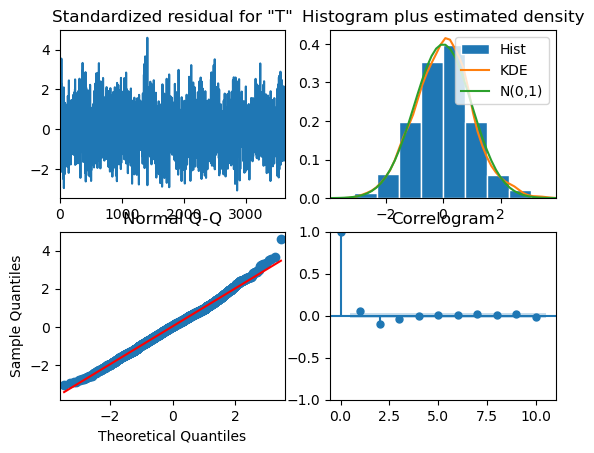

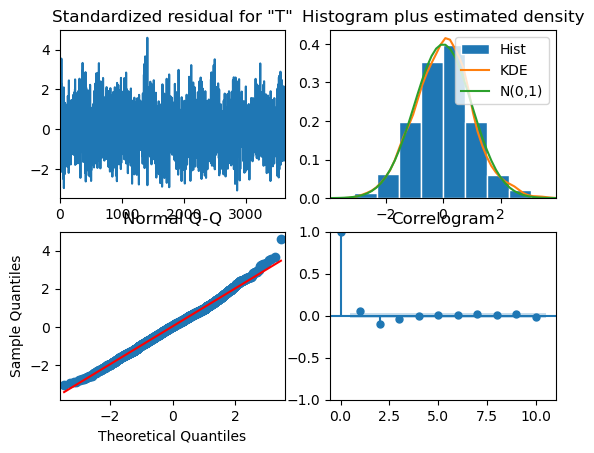

In [12]:
m.residual_analysis()

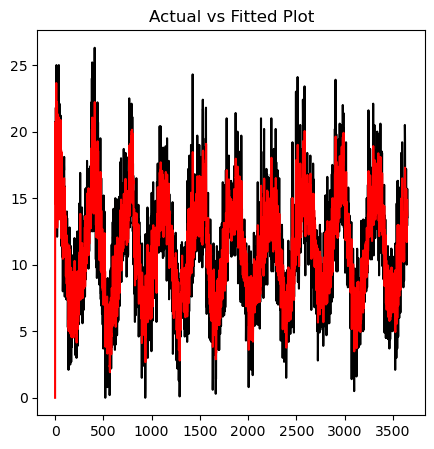

In [13]:
m.plot_fit()

In [14]:
m.get_fit_interval()

,lower Temp,upper Temp
0,-2771.818013,2771.818013
1,-1939.278682,1980.678601
2,-1942.078649,1977.878634
3,-1941.178649,1978.778634
4,-1945.378628,1974.578655
...,...,...
3645,9.476804,19.013534
3646,9.065588,18.602318
3647,8.917373,18.454101
3648,8.892820,18.429533


In [16]:
m.get_forecast_interval()

,lower Temp,upper Temp
3650,8.475395,18.012080
3651,8.151921,19.001832
3652,7.952235,19.251943
3653,7.842032,19.358349
3654,7.692557,19.347372
